In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.datasets import load_digits, load_iris
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [26]:
inpDir = os.path.join('..','..', 'input')
outDir = '../output'
moduleDir = 'machine_learning'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

In [27]:
iris = load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [28]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [30]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

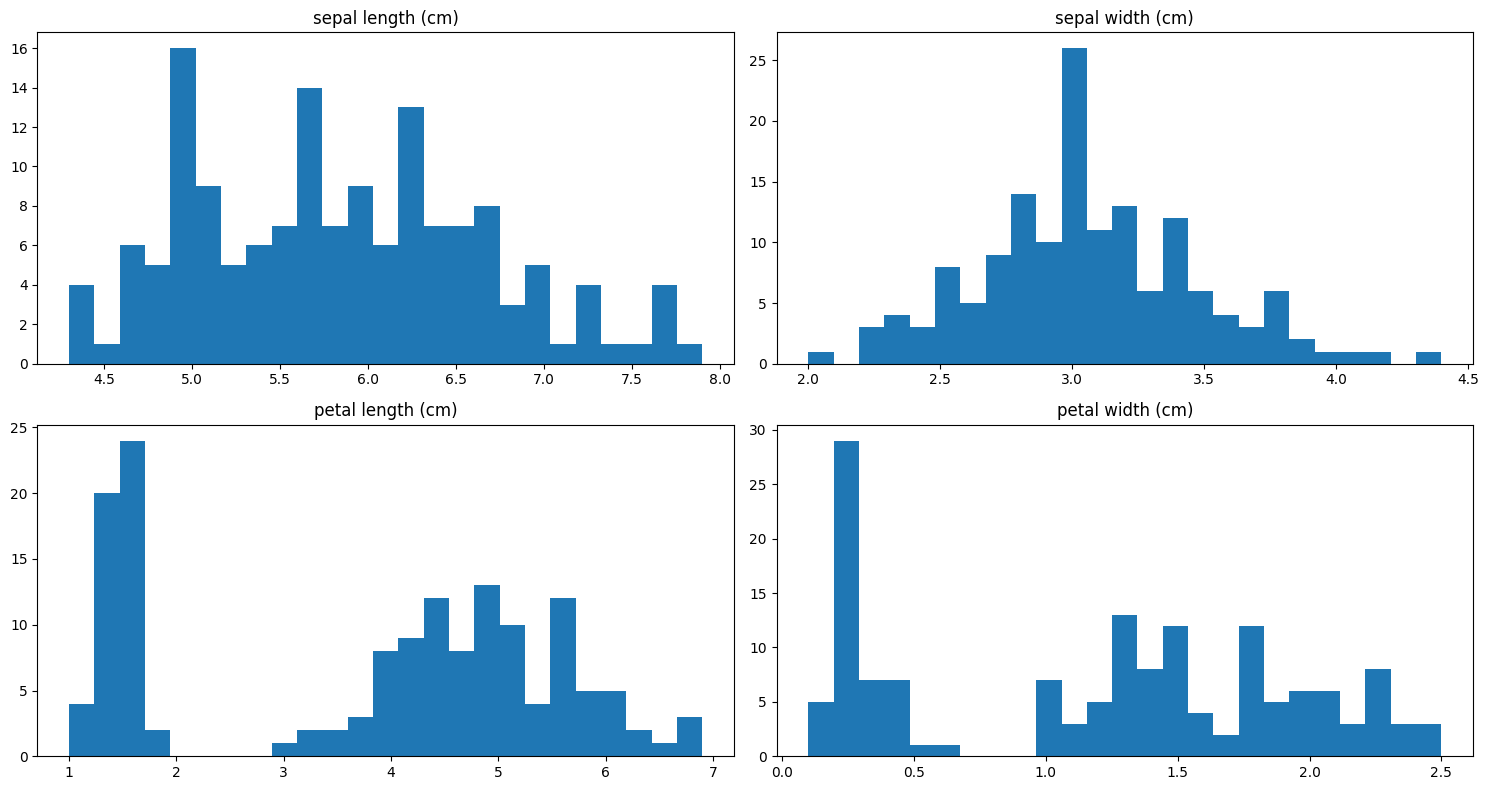

In [31]:
plt.figure(figsize=(15,8))

for count in range (4):  # Assuming X has 4 features
    plt.subplot(2,2,count+1)
    n, bins, patches = plt.hist(X[:,count],25)  # Use X[:,count] instead of X[:count]
    
    plt.title (iris.feature_names[count])
    
plt.tight_layout()
plt.show()

In [32]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X,y)

y_pred = clf.predict(X)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.96

In [34]:
xplot = X[:,0]
yplot = X[:,1]

x_err = xplot[(y != y_pred)]
y_err = yplot[(y !=y_pred)]
x_err.shape, y_err.shape

((6,), (6,))

In [36]:
target_names = iris.target_names

formatter = plt.FuncFormatter(lambda i, *arg: target_names[int(i)])

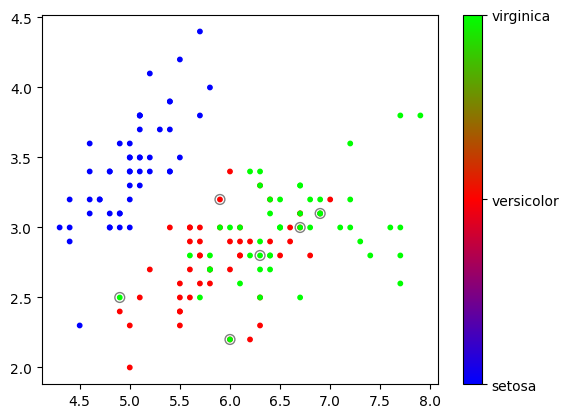

In [39]:
plt.scatter(xplot, yplot, s = 10, c =y, cmap=plt.cm.brg);

plt.colorbar(ticks = [0,1,2], format = formatter)
plt.scatter(x_err, y_err, s = 50, color = 'None', edgecolors='black', alpha = 0.5);

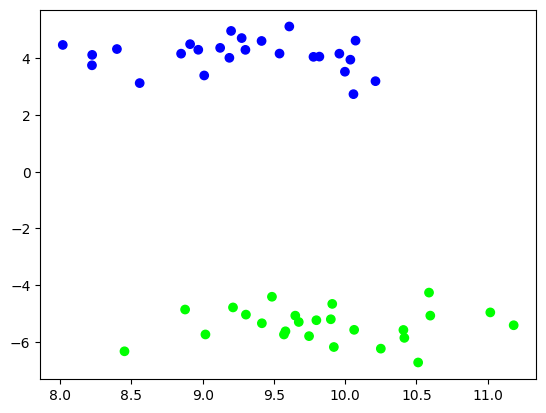

In [43]:
x, y = sklearn.datasets.make_blobs(n_samples=50, centers=2, random_state=RANDOM_STATE, cluster_std=0.6)

plt.scatter(x[:,0], x[:,1], c = y, cmap = plt.cm.brg)

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(x,y)

y_pred = clf.predict(x)

accuracy_score(y, y_pred)

1.0

In [62]:
confusion_matrix(y, y_pred)

array([[25,  0],
       [ 0, 25]])